# Grid Search Example

This notebook demonstrates the usage of our custom Grid Search implementation for hyperparameter tuning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from grid_search import GridSearchCV
from itertools import product

## Prepare the Dataset

In [2]:
# Generate a classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Perform Grid Search

In [3]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create and run the grid search
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Best parameters: {'C': 0.1, 'kernel': 'rbf', 'gamma': 'auto'}
Best cross-validation score: 0.8575045733171248
Test accuracy: 0.875


## Visualize Grid Search Results

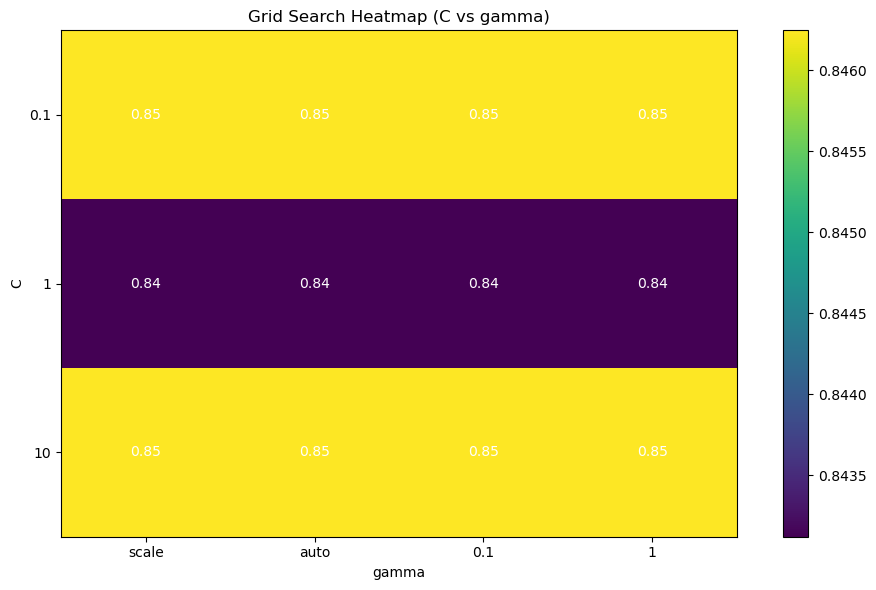

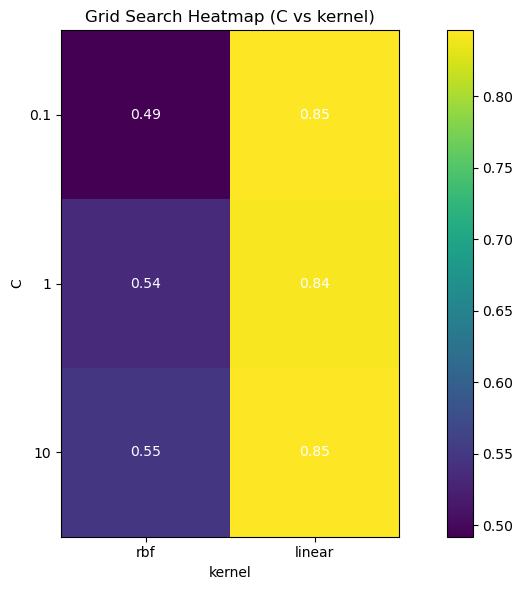

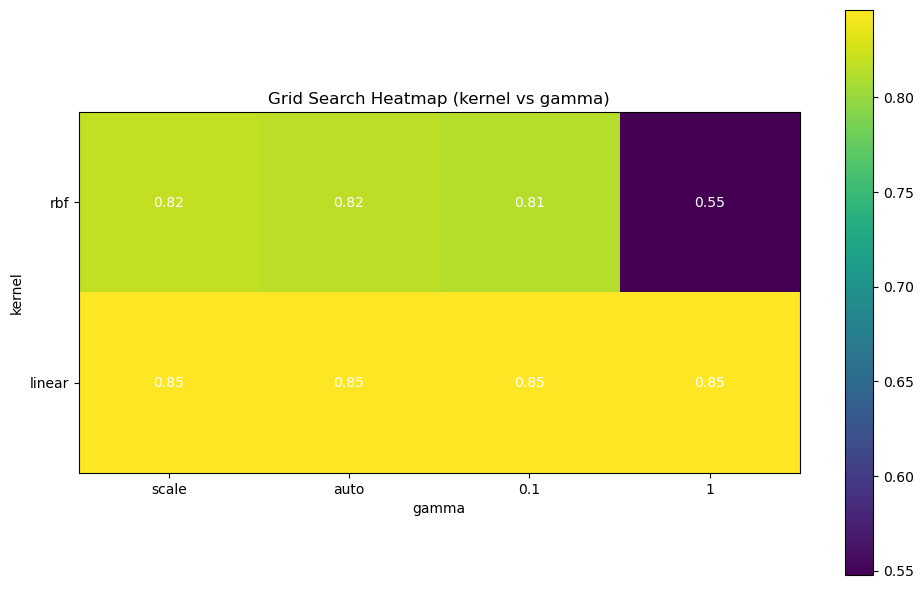

In [4]:
def plot_grid_search_heatmap(grid_search, param1, param2):
    # Extract scores and parameters
    scores = np.array([result['mean_test_score'] for result in grid_search.cv_results_])
    params1 = grid_search.param_grid[param1]
    params2 = grid_search.param_grid[param2]
    
    # Create a 2D array to hold the scores
    score_grid = np.full((len(params1), len(params2)), np.nan)
    
    # Fill in the score grid
    for idx, result in enumerate(grid_search.cv_results_):
        i = params1.index(result['params'][param1])
        j = params2.index(result['params'][param2])
        score_grid[i, j] = result['mean_test_score']
    
    plt.figure(figsize=(10, 6))
    plt.imshow(score_grid, interpolation='nearest', cmap='viridis')
    plt.title(f'Grid Search Heatmap ({param1} vs {param2})')
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.colorbar()
    
    plt.xticks(np.arange(len(params2)), params2)
    plt.yticks(np.arange(len(params1)), params1)
    
    for i, j in product(range(len(params1)), range(len(params2))):
        if not np.isnan(score_grid[i, j]):
            plt.text(j, i, f"{score_grid[i, j]:.2f}", ha="center", va="center", color="w")
    
    plt.tight_layout()
    plt.show()

# Plot heatmaps for different parameter combinations
plot_grid_search_heatmap(grid_search, 'C', 'gamma')
plot_grid_search_heatmap(grid_search, 'C', 'kernel')
plot_grid_search_heatmap(grid_search, 'kernel', 'gamma')

## Conclusion

This notebook demonstrated the usage of our custom Grid Search implementation for hyperparameter tuning. We used it to find the best parameters for an SVM classifier and visualized the results using heatmaps. This approach helps in understanding the impact of different hyperparameters on model performance and in selecting the optimal combination.